## A. Grundläggande neuralt nätverk med MNIST data setet

Ett av de första fallen där Neurala nätverk visade sig effektiva och välpresterande var vid igenkänning av handskrivna Postkoder för  den Amerikanska Posten. Nätverket som kallades LeNet skapades av Yann Lecun på 1990-talet.

I denna övning ska vi lära ett neuralt nätverk att klassificera handskriva siffror korrekt. Övningen är en typisk första övning inom neurala nätverk, hämtad från boken "Deep Learning with Python" av Francois Chollet som även byggt Keras. Rekommenderas för den som vill gräva djupare!


Boken "Deep Learning with Python": https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff

Github med tillhörande notebooks: https://github.com/fchollet/deep-learning-with-python-notebooks


#### Urval av data från MNIST-datasetet
![](https://www.researchgate.net/profile/Steven_Young11/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png)



MNIST-datasetet består av 70 000 bilder på handskrivna siffror. Namnet MNIST, Modified National Institute of Standards and Technology, kommer från institutet som skapade data setet med ett M tillagt då man modifierat det ursprungliga NIST-datasetet

Bilderna består av handskrivna tal, från 0 till och med 9, i gråskala och med enbart 28x28 pixlar

 #### Hjälpfunktioner

- Används senare för att plotta modellutvärdering

In [1]:
def plot_training(hist):
    
    print("accuracy, train: ", hist['accuracy'][-1])
    print("accuracy, validation: ", hist['val_accuracy'][-1])
    
    # Credd : https://janakiev.com/notebooks/keras-iris/
    # Plot training & validation accuracy values
    plt.plot(hist['accuracy'])
    plt.plot(hist['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

#### Import av bibliotek 

 Vi importerar Keras, som i sin tur använder TensorFlow som backend

In [2]:
import tensorflow.keras as keras


### Importera data

MNIST är ett standard data set, till den grad att det redan finns att hämta direkt från Keras!

Vi skapar här 4 stycken arrayer:
- train_images, träningsdata bestående av 60 000 bilder med 28x28 pixlar
- train_labels, 60 000 träningsetiketter som berättar vilken siffra träningsdatat ska representera


- test_images, 10 000 bilder som används för att testa modellen
- test_labels, 10 000 etiketter fför att testa modellen

In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


Träningsdatat består alltså av 60 000 bilder som alla representeras av en matris med 28 kolumner och 28 rader

In [4]:
train_images.shape

(60000, 28, 28)

train_labels består av en vektor med 60 000 rader, där varje rad säger vad train_image ska representera för siffra mellan 0-9

In [5]:
train_labels.shape

(60000,)

### Första träningsbilden

Tittar vi enbart på den första bilden i train_images,  train_images[0],  så får vi grepp om hur en bild representeras:

- 28 kolumner och 28 rader
- De flesta celler är 0, vilket innebär att de är svarta
- Cellerna i mitten symboliserar i detta fall en handskriven femma, desto närmare värdet 255 desto vitare är pixeln 

#### Exempel på första bilden

In [6]:
#print (train_images[0] )


I en formaterad version, blir det tydligt vad vår 28x28-matris  representerar:

![](https://github.com/DavidRyden/pics/blob/master/picture%20of%205.PNG?raw=true)

  ### test_images och test_labels
    
  - test_images består av 10 000 matris-representationer av handskriva siffror på precis på samma sätt som train_images
  
  - test_labels ger svaren på dessa test_images
  
  - Nedan är de två första observationerna

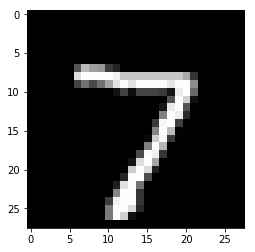

Test image nr 0 föreställer:  7 
 



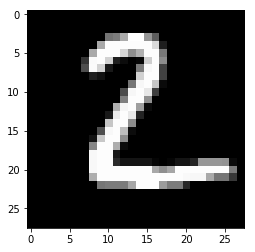

Test image nr 1 föreställer:  2 
 



In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.imshow(test_images[0], cmap='gray')
plt.show()
print("Test image nr 0 föreställer: ",test_labels[0] , "\n \n")

plt.imshow(test_images[1], cmap='gray')
plt.show()
print("Test image nr 1 föreställer: ",test_labels[1], "\n \n")



  ## Skapa neuralt nätverk

Vi använder datat till vår neurala nätverks-modell som vilken annan modell:

1. Vi låter vårt neurala nätverk träna på `train_images` och `train_labels`
2. Vi verifierar vår modells prediktioner med hjälp av `test_images` och `test_labels`

### Grundläggande struktur

Vi skapar här en grundläggande modellarkitektur, väldigt likt de vi tidigare skapat:

- Sequential()


- Ett ReLu-aktiverat lager med 512 neuroner


- Vi anger hur vår input ser ut med "(28 * 28,)". Vi "plattar" alltså till bilderna: istället för att se bilderna som 28 kolumner och 28 rader, ser vi de som 1 kolumn med 784 (28x28) rader 



- I vårt sista output-lager anger vi 10 neuroner och "softmax" aktivering då vi vill ha prediktioner för 10 klasser 


In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

# Output-lager
network.add(layers.Dense(10, activation='softmax'))


### Vidare konfiguration

Vi använder oss av Stochastic gradient descent (sgd), categorical_crossentropy och accuracy som tidigare


In [9]:
network.compile(optimizer='sgd', #rmsprop
                loss='categorical_crossentropy',
                metrics=['accuracy'])


### Transformera input-data

Vi såg tidigare att input data innehöll celler med värden mellan 0-255. Neurala nätverk konvergerar fortare om vi normaliserar input mellan intervallet 0 och 1. Vi transformerar därför datat genom att dividera alla celler med 255.

- Nu betyder 0 fortfarande svart, men det högsta värdet är 1 vilket nu står för helt vitt

Vi förändrar även data från än array med formen (60000,28,28) till (60000, 28 * 28). Vi plattar alltså ut input från att en bild bestått av 28 kolumner och 28 rader till att den blir endast en kolumn med 784 rader

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### Transformera labels

* Vi behöver också transformera våra labels för att nätverket ska kunna hantera dem. Istället för att en observation visar en siffra mellan 0 och 9, blir en observation en array med 10 dummy-variabler


**train_labels innan transformering**

- 60 000 rader och 1 kolumn

In [11]:
print("Form:",train_labels.shape)

print("\nDe tre första observationerna innan transformering: \n")
print(train_labels[0])
print(train_labels[1])
print(train_labels[2])

Form: (60000,)

De tre första observationerna innan transformering: 

5
0
4


**train_labels efter transformering**

Vi använder funktionen inbyggda keras-funktionen "to_categorical" för att utföra transformationen

In [12]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

- Nu har våra train_labels istället 60 000 rader och 10 kolumner

In [13]:
print("Form:",train_labels.shape)

print("\nDe tre första observationerna efter transformering: \n")
print("kolumn-namn")
print("[0  1  2  3  4  5  6  7  8  9 ]\n")


print(train_labels[0])
print(train_labels[1])
print(train_labels[2])

Form: (60000, 10)

De tre första observationerna efter transformering: 

kolumn-namn
[0  1  2  3  4  5  6  7  8  9 ]

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


### Träna nätverket

##### Valideringsdata
 
I detta case har vi tillräckligt många observationer för att använda tre data set

1. Train (50 000 obs),  att träna på
2. Validation (10 000 obs), att validera och försöka generalisera på
3. Test (10 000 obs), data vi inte är tillåtna att använda alls förens vi är klara med vår modell



- Train och Test har vi redan skapat, Validation skapar vi genom funktionen "validation_split=1/6", som samplar 1/6 av träningsdatat

- Vi är nu redo att träna modellen!

In [14]:
#Proportion av data till valideringsdata (vi vill ha 10 000 observationer)
val_prop = 1/6

history = network.fit(train_images, train_labels, epochs=50, batch_size=128,  validation_split=val_prop)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 51us/sample - loss: 1.1762 - accuracy: 0.7475 - val_loss: 0.6442 - val_accuracy: 0.8676
Epoch 2/50
50000/50000 [==============================] - 2s 43us/sample - loss: 0.5723 - accuracy: 0.8660 - val_loss: 0.4522 - val_accuracy: 0.8923
Epoch 3/50
50000/50000 [==============================] - 2s 43us/sample - loss: 0.4557 - accuracy: 0.8838 - val_loss: 0.3848 - val_accuracy: 0.9031
Epoch 4/50
50000/50000 [==============================] - 2s 43us/sample - loss: 0.4031 - accuracy: 0.8937 - val_loss: 0.3492 - val_accuracy: 0.9094
Epoch 5/50
50000/50000 [==============================] - 2s 44us/sample - loss: 0.3716 - accuracy: 0.8999 - val_loss: 0.3264 - val_accuracy: 0.9128
Epoch 6/50
50000/50000 [==============================] - 2s 44us/sample - loss: 0.3493 - accuracy: 0.9054 - val_loss: 0.3096 - val_accuracy: 0.9162
Epoch 7/50
50000/50000 [==============================] 

#### Modellutvärdering

- Vi utvärderar nu hur bra modellen tränar på träningsdata och generaliserar på Valideringsdata
- Är vi inte nöjda med modellen kan man lägga till fler noder, hidden layers eller t.ex introducera regularisering
- När vi sedan är nöjda utvärderar vi modellen en sista gång på test-data


accuracy, train:  0.96106
accuracy, validation:  0.9618


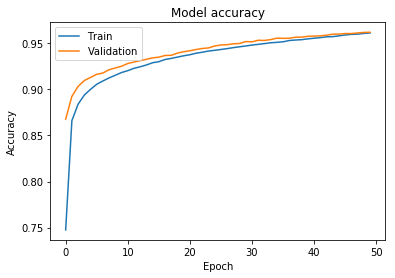

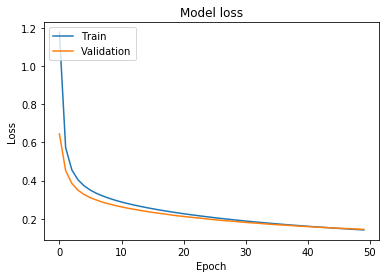

In [15]:
plot_training(history.history)


### Utvärdera på test-data

För att undersöka hur väl modellen generaliserar på data den inte tränar på, och vi inte heller försökt optimera generaliserbarheten, utvärderar vi modellen på test-datasetet

In [16]:
#Predicerar på test-data
test_loss, test_acc = network.evaluate(test_images, test_labels, verbose=0)

print('test accuracy:', test_acc)

test accuracy: 0.957


### Slutsats

På detta testdata får vi en accuracy på nästan 96-97%, alltså att modellen klassificerar 97% av bilderna korrekt.

Vi har med ett fåtal rader kod skapat en modell som klassificerar handskrivna siffror korrekt, med väldigt hög träffsäkerhet.

Även om detta med dagens mått inte är så imponerande längre, är det värt att komma ihåg att detta var "state of the art" för ett decennium sedan, och att vi enkelt kan replikera detta tack vare det open source-community som gjort detta tillgängligt för oss





 ### Är 100% träffsäkerhet önskvärd?

Även om vi inte får **100%** träffsäkerhet, kan man ha viss förståelse att modellen klassificerar fel på de observationer den gör.

Nedan undersöker vi den observation där vår modell är säker på en felaktig siffra, dvs där prediktionen och sanningen skiljer sig som mest

In [17]:
# Predicerar sannolikheter
test_pred = network.predict(test_images)
# Tar differens mellan prediktion och sanning
test_diff = test_pred-test_labels

Observation med störst differens mellan prediktion och sanning är nr :  [2044]


Prediktionen är siffran :  [7]  med en säkerhet på: [0.98986804]


Sanningen är :  [2]

Bilden ser ut såhär:


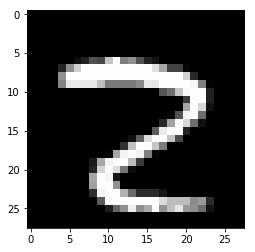

In [18]:
# Hämtar den observation med störst differens
import numpy as np
result = np.where(test_diff == np.amax(test_diff))

predicted = np.where(test_pred[result[0]] == np.amax(test_pred[result[0]]))

print('Observation med störst differens mellan prediktion och sanning är nr : ', result[0])
print("\n")

print('Prediktionen är siffran : ', predicted[1],' med en säkerhet på:', test_pred[result[0],predicted[1]]  )
print("\n")
print('Sanningen är : ',
      np.where(test_labels[result[0]] == np.amax(test_labels[result[0]]))[1])

print("\nBilden ser ut såhär:")
plt.imshow(test_images[ result[0] ].reshape(28,28), cmap='gray')
plt.show()


För det mänskliga ögat är det inte uppenbart att detta att vår "sanning" är korrekt

Skulle modellen lyckas klassificera detta korrekt krävs antingen att

- Det faktiskt är väldigt vanligt i indata att man skriver såhär slarvigt 
- Man låter man modellen överträna till den grad att den på ett nytt dataset skulle felklassificera andra observationer

 
### Ett ännu bättre exempel - Rabbit vs. duck

- Vad vill vi klassificera nedan bild som, kanin eller anka?
 

In [10]:
from IPython.display import IFrame    
IFrame("https://gfycat.com/ifr/FamousGleefulChimpanzee", width=800, height=550)

## B. Convolutional Neural Network med MNIST

Vi testar nu övningen med Convolutional lager istället Dense-lager



 #### Laddar in mnist-data igen

För CNN behöver vi skapa en 4:e dimension. 60000 syftar på våra träningsexempel. 28*28 syftar på antal pixlar i bilden (width*height). Utöver det behöver vi dessutom specificera antalet färgkanaler. Eftersom vi jobbar med svartvita bilder så har vi endast 1 färgkanal (60000, 28, 28, 1). Hade vi däreemot haft en färgbild så hade vi behövt specificera 3 input kanaler i linje med RGB formatet(red, green, blue). Då hade vi behövt skriva x_train_resized = x_train.reshape((60000, 28, 28, 3))


In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#För CNN behöver vi skapa en 4:e dimension 
x_train_resized = x_train.reshape((60000, 28, 28, 1))
x_test_resized = x_test.reshape((10000, 28, 28, 1))

#Återigen skapar vi dummy-variabler för respektive siffra
y_train_labels = to_categorical(y_train)
y_test_labels = to_categorical(y_test)

 #### Modell-arkitektur
 
 
Vi skapar här en grundläggande modellarkitektur, likt de vi tidigare gått igenom idag:

- Alternerar mellan Convolutional Neural Networks och Maxpooling-lager

- "Plattar" slutligen till vårt nätverk och kör ett Dense-lager


- I vårt sista output-lager anger vi 10 neuroner och "softmax" aktivering då vi vill ha prediktioner till våra 10 klasser


In [18]:
CNN_model = models.Sequential()
CNN_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # 28*28 pixlar med 1 kanal (svartvit bild)
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

CNN_model.add(layers.Flatten())
CNN_model.add(layers.Dense(64, activation='relu'))
CNN_model.add(layers.Dense(10, activation='softmax'))

# samma kompilering som tidigare
CNN_model.compile(optimizer='sgd',  #rmsprop
              loss='categorical_crossentropy',
              metrics=['accuracy'])
CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

#### Träna nätverket

- Vi tränar återigen nätverket med 10 000 obs i validering

- Eftersom CNN är mer tidskrävande kör vi bara ett fåtal epochs och testar även en förtränad modell

In [19]:
val_prop=1/6

history = CNN_model.fit(x_train_resized,
                        y_train_labels,
                        epochs=5, #Vi tränar väldigt kort, endast 5 epochs, addera fler om du vill
                        batch_size=256,
                        validation_split=val_prop)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 28s 559us/sample - loss: 2.7149 - accuracy: 0.6174 - val_loss: 0.2484 - val_accuracy: 0.9245
Epoch 2/5
50000/50000 [==============================] - 28s 557us/sample - loss: 0.1959 - accuracy: 0.9401 - val_loss: 0.1561 - val_accuracy: 0.9538
Epoch 3/5
50000/50000 [==============================] - 28s 551us/sample - loss: 0.1281 - accuracy: 0.9611 - val_loss: 0.1122 - val_accuracy: 0.9677
Epoch 4/5
50000/50000 [==============================] - 28s 567us/sample - loss: 0.1029 - accuracy: 0.9680 - val_loss: 0.0970 - val_accuracy: 0.9722
Epoch 5/5
50000/50000 [==============================] - 30s 591us/sample - loss: 0.0842 - accuracy: 0.9738 - val_loss: 0.1044 - val_accuracy: 0.9690


När modeller tar längre tid att träna är det viktigt att spara ned dem

In [20]:
CNN_model.save('MNIST_CNN_V1.h5')

In [21]:
# Spara ned träningshistoriken
import pickle
with open('MNIST_CNN_V1_hist', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

### Ladda in förtränad model

Eftersom att vi inte hinner träna vår modell särskilt länge under vår övningsdag, kan vi här ladda in en förtränad modell och dess historik

In [22]:
from tensorflow.keras.models import load_model
import pickle
 
# Ladda in förtränad model
CNN_model_pretrain = load_model('MNIST_CNN_V1_100_epochs.h5')

# Ladda in historiken för förtränad model

with open('MNIST_CNN_V1_100_epochs_hist', 'rb') as f:
    # load using pickle de-serializer
    history_pretrain = pickle.load(f)

#### Modellutvärdering

- Vi utvärderar nu hur bra modellen tränar på träningsdata och generaliserar på Valideringsdata
- Är vi inte nöjda med modellen kan man lägga justerar vi den och tränar återigen
- När vi sedan är nöjda utvärderar vi modellen en sista gång på test-data


accuracy, train:  0.97376
accuracy, validation:  0.969


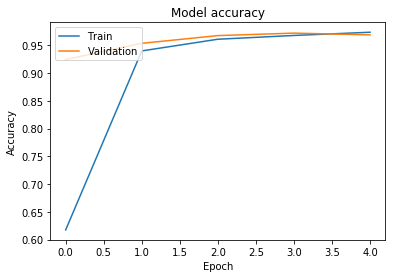

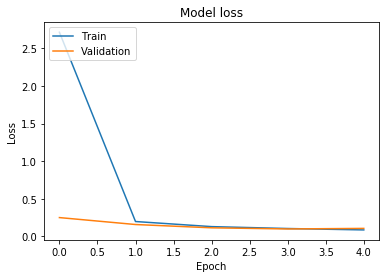

In [23]:
plot_training(history.history)

#### Historik för vårt förtränade nätverk

- Med vårt förtränade nätverk når vi högre accuracy då det fått träna längre

accuracy, train:  1.0
accuracy, validation:  0.9846


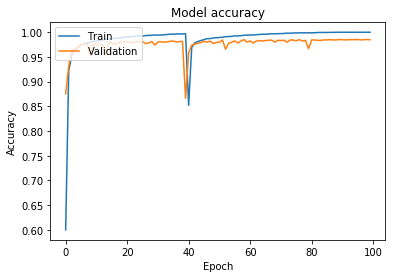

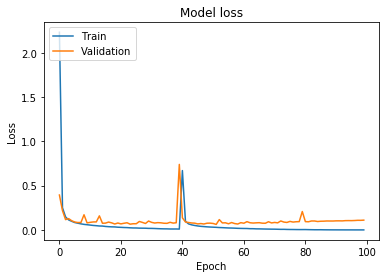

In [24]:
plot_training(history_pretrain )

 ### Utvärdera på test-data

För att undersöka hur väl modellen generaliserar på data den inte tränar på, och vi inte heller försökt optimera generaliserbarheten, utvärderar vi modellen på test-datasetet

#### Vår egen träning

In [25]:
#Predicerar på test-data
test_loss, test_acc = CNN_model.evaluate(x_test_resized, y_test_labels, verbose=0)

print('test accuracy:', test_acc)

test accuracy: 0.9677


#### Förtränad modell


In [26]:
#Predicerar på test-data
test_loss_pre, test_acc_pre = CNN_model_pretrain.evaluate(x_test_resized, y_test_labels, verbose=0)

print('test accuracy:', test_acc_pre)

test accuracy: 0.9847


### Slutsats - Convolutional neural network

- Vi uppnår högre accuracy med CNN än enkelt Dense nätverk
- MNIST klarar sig bra med enkelt Dense nätverk, vid komplexare problem är CNN betydligt kraftfullare traditionella nätverk med enbart Dense-lager